# 1.1 Keras tutorial
이번 실습에서는 keras를 이용하여 간단한 모델을 생성하고, 학습하여 성능을 평가한다.

In [1]:
%matplotlib inline
from tensorflow import keras
#import keras
import numpy as np
import matplotlib.pyplot as plt

## (1)데이터셋 준비
Input(x)와 Output(y) 간의 관계(y=x*3)를 학습하기 위한 데이터셋 준비

In [2]:
x = np.arange(20) # 0, 1, 2, 3...., 19
y = x * 3


x_test =np.arange(50,70)
y_test = x_test*3
n_in =1
n_out =1

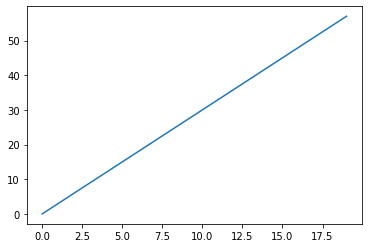

In [3]:
plt.plot(x,y)

## (2) Keras 모델링
keras.layers : 모델을 구성하기 위한 layer들이 구현되어 있는 모듈

keras.models : layer들을 묶어 모델을 정의하고 학습, 평가, 예측 등의 기능을 구현한 모듈

In [4]:
from tensorflow.keras import models, layers

Keras에서는 크게 Functional, Sequential 방식으로 모델을 구현

Function 방식은 모델을 수식처럼 구현

Sequential 방식은 모델에 필요한 layer들을 순차적으로 더해가는 방식으로 구현

<사용되는 Layer>

Input : 모델에 입력되는 데이터의 batch size를 제외한 shape을 결정

Dense : Fully Connected Layer

https://keras.io/layers/core/#dense

### Sequential Modeling

In [13]:
def modeling_sequential(n_in, n_out):
    model = models.Sequential()
    model.add(layers.Dense(units =n_out, input_shape=(n_in,)))
    return model

In [14]:
class modeling_sequential_class(models.Sequential):
    def __init__(self, n_in, n_out):
        
        #멤버 변수로 모델에 사용할 변수 선언
        self.n_in = n_in
        self.n_out = n_out
        
        #상속받은 Sequential 클래스 초기화 후 레이어 추가
        super().__init__()
        self.add(layers.Dense(units =n_out, input_shape=(n_in,)))

### Functional Modeling

In [15]:
def modeling_functional(n_in, n_out):
    x = layers.Input(shape=(n_in,))
    y = layers.Dense(n_out)(x)
    model = models.Model(inputs = x, outputs = y)
    return model

In [16]:
class modeling_functional_class(models.Model):
    def __init__(self, n_in, n_out):
        
        #멤버 변수로 모델에 사용할 변수 및 레이어 선언
        self.n_in = n_in
        self.n_out = n_out
        input = layers.Input(shape=(n_in,))
        output = layers.Dense(n_out)
        
        # layer 연결
        x = input
        y = output(x)

        #상속받은 Model 클래스 초기화
        super().__init__(x, y)

### 모델 확인하기
생성된 모델은 내부함수인 summary()나, vis_utils의 model_to_dot()으로 모델 내부의 layers 구조 및 파라미터 수 등을 확인할 수 있음

In [9]:
model =  modeling_sequential(n_in, n_out)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [10]:
model =  modeling_sequential_class(n_in, n_out)
model.summary()

Model: "modeling_sequential_class"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [11]:
model =  modeling_functional(n_in, n_out)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [12]:
model = modeling_functional_class(n_in, n_out)
model.summary()

Model: "modeling_functional_class"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


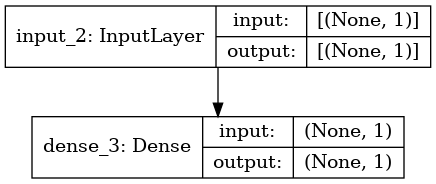

In [17]:
from tensorflow.keras.utils import plot_model
%matplotlib inline

plot_model(model, show_shapes=True)

## (3) 모델의 학습과정 설정
생성한 모델 객체의 compile 함수를 사용하여 학습과정 설정

모델의 학습시킬 때 사용할 loss function, optimizer, metric 등을 설정

https://keras.io/models/model/

In [18]:
model.compile(loss='mse', optimizer='sgd')

## (4) 모델 학습시키기
모델 객체의 fit 함수를 사용하여 모델을 학습

fit 함수는 학습과정이 담겨있는 history 객체를 반환

In [19]:
history = model.fit(x, y, batch_size=5, epochs=100, validation_split=0.2)

Epoch 1/100
4/4 [==============================] - 1s 118ms/step - loss: 110.0408 - val_loss: 0.4080
Epoch 2/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0679 - val_loss: 0.0602
Epoch 3/100
4/4 [==============================] - 0s 16ms/step - loss: 0.0128 - val_loss: 0.0788
Epoch 4/100
4/4 [==============================] - 0s 13ms/step - loss: 0.0150 - val_loss: 0.0077
Epoch 5/100
4/4 [==============================] - 0s 17ms/step - loss: 0.0189 - val_loss: 0.0877
Epoch 6/100
4/4 [==============================] - 0s 17ms/step - loss: 0.0122 - val_loss: 0.0198
Epoch 7/100
4/4 [==============================] - 0s 13ms/step - loss: 0.0116 - val_loss: 0.0698
Epoch 8/100
4/4 [==============================] - 0s 18ms/step - loss: 0.0164 - val_loss: 0.0685
Epoch 9/100
4/4 [==============================] - 0s 14ms/step - loss: 0.0127 - val_loss: 3.2292e-04
Epoch 10/100
4/4 [==============================] - 0s 19ms/step - loss: 0.0113 - val_loss: 0.0853
Epoch 11/100

4/4 [==============================] - 0s 17ms/step - loss: 6.0048e-04 - val_loss: 0.0014
Epoch 84/100
4/4 [==============================] - 0s 18ms/step - loss: 4.7588e-04 - val_loss: 0.0012
Epoch 85/100
4/4 [==============================] - 0s 16ms/step - loss: 7.7142e-04 - val_loss: 7.8853e-04
Epoch 86/100
4/4 [==============================] - 0s 18ms/step - loss: 4.5377e-04 - val_loss: 0.0011
Epoch 87/100
4/4 [==============================] - 0s 11ms/step - loss: 4.5072e-04 - val_loss: 0.0042
Epoch 88/100
4/4 [==============================] - 0s 17ms/step - loss: 7.7875e-04 - val_loss: 0.0010
Epoch 89/100
4/4 [==============================] - 0s 18ms/step - loss: 6.3104e-04 - val_loss: 0.0158
Epoch 90/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0054 - val_loss: 0.0029
Epoch 91/100
4/4 [==============================] - 0s 13ms/step - loss: 5.5939e-04 - val_loss: 0.0059
Epoch 92/100
4/4 [==============================] - 0s 15ms/step - loss: 8.6221e-04 - 

## (5) 모델 평가하기
모델 객체의 evaluate 함수로 test 데이터에 대한 모델의 성능을 평가

In [20]:
loss= model.evaluate(x_test, y_test, batch_size=20)
print('loss : %.4f'%(loss))

1/1 [==============================] - 0s 61ms/step - loss: 0.0046
loss : 0.0046


## (6) 모델 사용하기
모델 객체의 predict 함수로 input 데이터에 대한 모델의 예측결과를 반환

In [21]:
new_x = np.arange(100,120)
true_y = new_x*3

pred_y = model.predict(new_x, batch_size=20)
pred_y = np.reshape(pred_y,(-1,))
for y in zip(true_y, pred_y):
    print("true y : %.2f, prediction y : %.2f"%(y[0], y[1]))

true y : 300.00, prediction y : 300.09
true y : 303.00, prediction y : 303.09
true y : 306.00, prediction y : 306.09
true y : 309.00, prediction y : 309.10
true y : 312.00, prediction y : 312.10
true y : 315.00, prediction y : 315.10
true y : 318.00, prediction y : 318.10
true y : 321.00, prediction y : 321.10
true y : 324.00, prediction y : 324.10
true y : 327.00, prediction y : 327.10
true y : 330.00, prediction y : 330.10
true y : 333.00, prediction y : 333.10
true y : 336.00, prediction y : 336.10
true y : 339.00, prediction y : 339.10
true y : 342.00, prediction y : 342.10
true y : 345.00, prediction y : 345.10
true y : 348.00, prediction y : 348.10
true y : 351.00, prediction y : 351.10
true y : 354.00, prediction y : 354.11
true y : 357.00, prediction y : 357.11


# 1.1 MNIST Classification with Linear Classifier
이번 실습에서는 keras로 linear 모델을 생성하고, MNIST dataset을 학습하여 성능을 평가한다.

In [22]:
import tensorflow.keras.utils as utils
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Activation

import numpy as np
import matplotlib.pyplot as plt

## (1) 데이터셋 다운로드
### Download the MNIST dataset
MNIST dataset은 28x28 사이즈의 이미지들로 0~9까지의 숫자 10개의 손글씨 이미지로 이루어져있다.

60,000장이 training에 사용되고 10,000장이 test에 사용된다.

In [23]:
(X_train, Y_train),(X_test, Y_test) = datasets.mnist.load_data()
print(X_train.shape, Y_train.shape)

11493376/11490434 [==============================] - 1s 0us/step
(60000, 28, 28) (60000,)


label :  5


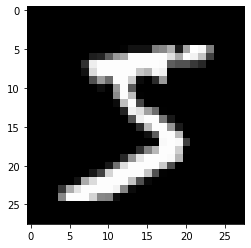

In [24]:
print('label : ',Y_train[0])
plt.imshow(X_train[0], cmap='gray')

input(X)를 flatten, normalize

output(Y)를 onehot encoding

In [25]:
X_train_flat = X_train.reshape(60000, 28*28).astype('float32')/255.0
X_test_flat = X_test.reshape(10000, 28*28).astype('float32')/255.0
Y_train_onehot = utils.to_categorical(Y_train)
Y_test_onehot = utils.to_categorical(Y_test)
print(Y_train_onehot)
print(X_train_flat.shape, Y_train_onehot.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
(60000, 784) (60000, 10)


## (2) Keras 모델링

<사용되는 Layer>

Input : 모델에 입력되는 데이터의 batch size를 제외한 shape을 결정

https://keras.io/layers/core/#input

Dense : Fully Connected Layer

https://keras.io/layers/core/#dense

Activation : Activation Function을 정의, 문자열로 입력

https://keras.io/layers/core/#activation

In [26]:
n_in = 28*28   #784
n_out = np.shape(Y_test_onehot)[1] # 10

### Functional Modeling

In [27]:
def linear_model_func(n_in, n_out):
    x = Input(shape=(n_in,))
    h = Dense(n_out)(x)
    y = Activation('softmax')(h)
    model = Model(inputs = x, outputs = y)
    return model

### Sequential Modeling

In [28]:
def linear_model_seq(n_in, n_out):
    model = Sequential()
    model.add(Dense(units =n_out, input_shape=(n_in,), activation='softmax'))
    return model

In [29]:
model = linear_model_func(n_in, n_out)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                7850      
_________________________________________________________________
activation (Activation)      (None, 10)                0         
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


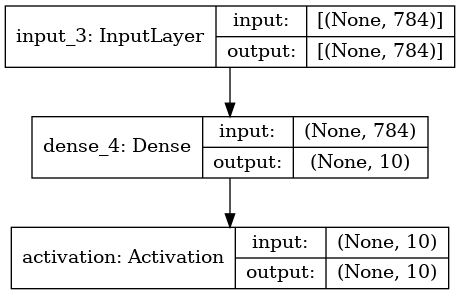

In [30]:
plot_model(model, show_shapes=True)

## (3) 모델의 학습과정 설정
accuracy를 측정할 수 있는 문제라면 metric에 accuracy를 설정

https://keras.io/models/model/

In [31]:
model.compile(loss='categorical_crossentropy', 
              optimizer='sgd',
              metrics=['accuracy'])

## (4) 모델 학습시키기

In [32]:
history = model.fit(X_train_flat, Y_train_onehot, batch_size=128, epochs=20, validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 1.6991 - accuracy: 0.5375 - val_loss: 0.8810 - val_accuracy: 0.8323
Epoch 2/20
375/375 [==============================] - 1s 4ms/step - loss: 0.8426 - accuracy: 0.8185 - val_loss: 0.6515 - val_accuracy: 0.8622
Epoch 3/20
375/375 [==============================] - 1s 4ms/step - loss: 0.6586 - accuracy: 0.8492 - val_loss: 0.5585 - val_accuracy: 0.8727
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.5838 - accuracy: 0.8603 - val_loss: 0.5065 - val_accuracy: 0.8788
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.5355 - accuracy: 0.8670 - val_loss: 0.4730 - val_accuracy: 0.8828
Epoch 6/20
375/375 [==============================] - 1s 4ms/step - loss: 0.5039 - accuracy: 0.8722 - val_loss: 0.4491 - val_accuracy: 0.8872
Epoch 7/20
375/375 [==============================] - 1s 4ms/step - loss: 0.4750 - accuracy: 0.8776 - val_loss: 0.4314 - val_accuracy: 0.8902
Epoch 

## (5) 모델 평가하기

In [ ]:
loss_and_accuracy = model.evaluate(X_test_flat, Y_test_onehot, batch_size=128)
print('loss : %.4f, accruracy : %.4f'%(loss_and_accuracy[0],loss_and_accuracy[1]))

## (6) 모델 사용하기

In [ ]:
test_data = X_test[-1].reshape(1,28*28)
pred_y = model.predict(test_data)
pred_y = pred_y.argmax()

print('predict label : ',Y_test[-1])
plt.imshow(X_test[-1], cmap='gray')

# 1.2 MNIST Classification with DNN (to do)
이번 실습에서는 keras로 DNN 모델을 생성하고, MNIST dataset을 학습하여 성능을 평가한다.

## (2) Keras 모델링

<사용되는 Layer>

Input : 모델에 입력되는 데이터의 batch size를 제외한 shape을 결정

Dense : Fully Connected Layer

Activation : Activation Function을 정의, 문자열로 입력
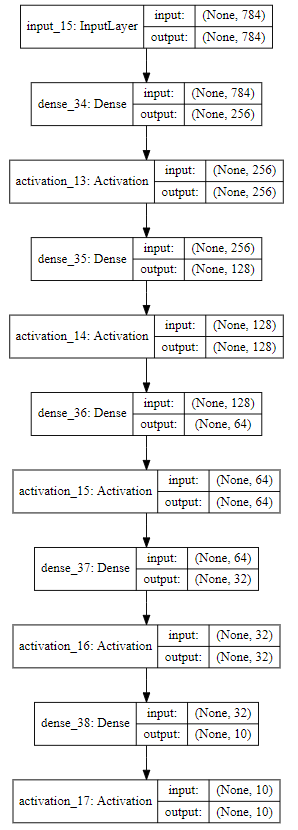

<맨 마지막 activation은 softmax로 하고 이외의 activation은 relu를 사용>

https://keras.io/layers/core/#activation

In [ ]:
def DNN_func(n_in, n_out):
    x = Input(shape=(n_in,))
    x = Dense(256)(x)
    x = Activation('relu')(x)
    x = Dense(128)(x)
    x = Activation('relu')(x)
    x = Dense(64)(x)
    x = Activation('relu')(x)
    x = Dense(32)(x)
    x = Activation('relu')(x)
    x = Dense(n_out)(x)
    y = Activation('softmax')(x)
    model = Model(inputs = x, outputs = y)
    return model

def DNN_seq(n_in, n_out):
    model = Sequential()
    return model

## (3) 모델의 학습과정 설정
<optimizer를 adam으로 설정>

## (4) 모델 학습시키기
<batch size를 256, epoch을 30, train 데이터 중 30%를 validation 데이터로 사용, verbose 모드는 2>

## (5) 모델 평가하기

## (6) 모델 사용하기